# Potencial eléctrico en una región cerrada con condiciones de frontera.

## Ecuación de Laplace.
$\nabla^2 V =0$.

En el siguiente algoritmo se procede a encontrar el potencial eléctrico en una región rectangular de puntos equidistantes utilizando el método numérico de iteración o diferencias finitas para luego comprobar el potencial en un punto particular mediante el método de separación de variables.


In [1]:
"""
Created on Sat Nov 24 2018
Last edition on Sun Dec 02 2018

@author: Ignacio Ribbeck 

@email: iRibbeck@outlook.com
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

v1 = potencial de la frontera izquierda

v2 = potencial de la frontera superior

v3 = potencial de la frontera derecha

v4 = potencial de la frontera inferior

In [2]:
#Potencial de las fronteras
v1=0
v2=1
v3=0
v4=0

#número de puntos por eje 
nx=200+1
ny=100+1

#número de iteraciones
ni=1000


### Se procede a crear una matriz de ceros de la dimension de los puntos definidos anteriormente, estos serán los potenciales iniciales los cuales serán iterados más adelante.

In [3]:
v = np.zeros((ny,nx))

In [4]:
#Nueva forma de asignar los potenciales evitando ciclos, para mayor eficiencia 
#computacional (consejo de la profesora Nataly Ibarra)

v[:,0] = v1      #Primera columna, fila 1 hasta ny
v[:,-1] = v3     #Ultima culumna, fila 1 hasta ny
v[0,:] = v4      #Primera fila, columna 1 hasta nx
v[-1,:] = v2     #Ultima fila, columna 1 hasta nx
    
#Potenciales en las intersecciones entre fronteras    
v[0,0] = 0.5*(v1 + v4)
v[-1,0] = 0.5*(v1 + v2)
v[0,-1] = 0.5*(v3 + v4)
v[-1,-1] = 0.5*(v2 + v3)

### Cálculo del potencial en cada punto de la malla resolviendo la ecuación de laplace por medio de diferencias finitas.

In [5]:
for k in range(ni):
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            v[i,j] = 0.25*( v[i-1,j] + v[i,j+1] + v[i+1,j] + v[i,j-1] )

<function matplotlib.pyplot.show(*args, **kw)>

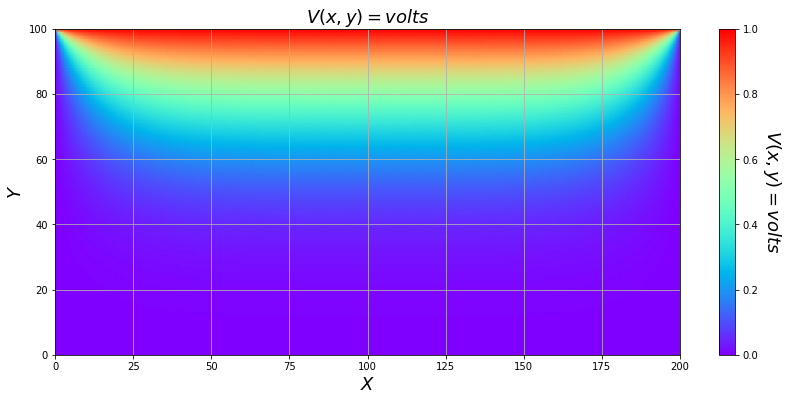

In [6]:
plt.figure(figsize=(14,6))
plt.pcolormesh(v, shading='gouraud', cmap='rainbow')
plt.grid()
plt.xlabel('$X$',fontsize=18)
plt.ylabel('$Y$',fontsize=18)
plt.title('$V(x,y)=volts$',fontsize=18)
clb = plt.colorbar()
clb.set_label('$V(x,y)=volts$', labelpad=25, y=0.5, rotation=270,fontsize=18)
plt.show

In [7]:
print("Potencial en la coordenada (a/2 , 3a/4) = " + str(round(v[75,50],5)) + '*Vo')

Potencial en la coordenada (a/2 , 3a/4) = 0.41406*Vo


## Método separación de variables.
### Según la ecuación obtenida en clases para un punto $(a/2 , 3a/4)$.

Calculamos la sumatoria con
$n\in[1,3,5,...,39]$.

In [8]:
Vt = 0
for k in range(1, 20):
    n = 2*k-1
    Vt += ((4/np.pi)*(np.sin((n*np.pi)/4)*(np.sinh((n*3*np.pi)/8)))
          /(n*np.sinh((n*np.pi)/2)))
print("Potencial en la coordenada (a/2 , 3a/4) = " + str(round(Vt,5)) + '*Vo')

Potencial en la coordenada (a/2 , 3a/4) = 0.63747*Vo


Tal como se puede observar más arriba, los valores del potencial en un punto específico de coordenadas (a/2 , 3a/4) difiere entre un método y el otro, donde el error porcentual, considerando que el método de separación de variables es el valor teórico correcto, se puede calcular el error porcentual del método numérico de la siguiente forma.

In [9]:
error = abs(((Vt-v[75,50])/Vt)*100)
print("El error porcentual es: " + str(round(error,4)) + '%')

El error porcentual es: 35.0472%


### El error anterior corresponde para 1000 iteraciones en el método numérico y la suma de 20 términos para la serie de senos hiperbólicos.

Ahora se procede a calcular el error porcentual para 2000 y 10000 iteraciones en el método numérico y 225 términos para la samatoria de senos hiperbólicos, el valor de $k=225$ es debido a que es el número máximo permitido en $n=2K-1$ antes de obtener errores de ejecución, aunque cabe destacar que la diferencia en el resultado de la sumatoria para 20 y 225 términos es mínima, por lo que se podría considerar, para este caso, como un valor aproximado al de la convergencia cuando se habla de un $k=225$.


### Cálculo de 2000 iteraciones.

In [10]:
#primero debe reestablecerse la matriz de potencial, para que no se acumulen
#las iteraciones anteriores

v = np.zeros((ny,nx))
v[:,0] = v1      #Primera columna, fila 1 hasta ny
v[:,-1] = v3     #Ultima culumna, fila 1 hasta ny
v[0,:] = v4      #Primera fila, columna 1 hasta nx
v[-1,:] = v2     #Ultima fila, columna 1 hasta nx

v[0,0] = 0.5*(v1 + v4)
v[-1,0] = 0.5*(v1 + v2)
v[0,-1] = 0.5*(v3 + v4)
v[-1,-1] = 0.5*(v2 + v3)

ni = 2000   #número de iteraciones
for k in range(ni):
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            v[i,j] = 0.25*( v[i-1,j] + v[i,j+1] + v[i+1,j] + v[i,j-1] )
            
print("Potencial en la coordenada (a/2 , 3a/4) = " + str(round(v[75,50],5)) + '*Vo')

Potencial en la coordenada (a/2 , 3a/4) = 0.5357*Vo


### Cálculo de la sumatoria $k=225$.

In [11]:
Vt = 0
for k in range(1, 225):
    n = 2*k-1
    Vt += ((4/np.pi)*(np.sin((n*np.pi)/4)*(np.sinh((n*3*np.pi)/8)))
          /(n*np.sinh((n*np.pi)/2)))
print("Potencial en la coordenada (a/2 , 3a/4) = " + str(round(Vt,5)) + '*Vo')

Potencial en la coordenada (a/2 , 3a/4) = 0.63747*Vo


### Cálculo del error porcentual.

In [12]:
error = abs(((Vt-v[75,50])/Vt)*100)
print("El error porcentual del método numérico es: " + str(round(error,4)) + '%')

El error porcentual del método numérico es: 15.9658%


Se puede observar que el error ha disminuido de un 35.0472% a un 15.9658% lo cual implica que ha un mayor número de iteraciones y términos en la sumatoria, más exacto es el valor del potencial eléctrico, ya que ambos métodos estarían convergiendo a un mismo valor. Esto es una conclusión prematura que deberá ser puesta a prueba más adelante.

### Cálculo de 10000 iteraciones.

In [13]:
#primero debe reestablecerse la matriz de potencial, para que no se acumulen 
#las iteraciones anteriores

v = np.zeros((ny,nx))
v[:,0] = v1      #Primera columna, fila 1 hasta ny
v[:,-1] = v3     #Ultima culumna, fila 1 hasta ny
v[0,:] = v4      #Primera fila, columna 1 hasta nx
v[-1,:] = v2     #Ultima fila, columna 1 hasta nx

v[0,0] = 0.5*(v1 + v4)
v[-1,0] = 0.5*(v1 + v2)
v[0,-1] = 0.5*(v3 + v4)
v[-1,-1] = 0.5*(v2 + v3)

ni = 10000   #número de iteraciones
for k in range(ni):
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            v[i,j] = 0.25*( v[i-1,j] + v[i,j+1] + v[i+1,j] + v[i,j-1] )
            
print("Potencial en la coordenada (a/2 , 3a/4) = " + str(round(v[75,50],5)) + '*Vo')

Potencial en la coordenada (a/2 , 3a/4) = 0.63676*Vo


### Cálculo del error porcentual.

In [14]:
error = abs(((Vt-v[75,50])/Vt)*100)
print("El error porcentual del método numérico es: " + str(round(error,4)) + '%')

El error porcentual del método numérico es: 0.1117%


In [15]:
print("La diferencia de los potenciales entre ambos métodos en un punto")
print("particular de coordenadas (a/2 , 3a/4) es: ",round(abs((Vt-v[75,50])),6))

La diferencia de los potenciales entre ambos métodos en un punto
particular de coordenadas (a/2 , 3a/4) es:  0.000712


# Conclusión.
 El método numérico resulta ser una solución bastante práctica cuando se cuenta con una computadora y el algoritmo adecuado, siendo una solución mucho más rápida que la separación de variables, ya que, evita el extenso trabajo de solucionar una ecuación diferencial parcial de segundo grado con valores en la frontera. Como ambos métodos dependen de realizar cálculos infinitos, la precisión de ambos es un factor muy importante a considerar si se quiere utilizar dicha solución en un problema aplicado en la realidad.